Four Optimization Algorithms

Stuck in local minima:
Hillclimbing: start x =1 function two - caught in local(not optimal) minimum Gradient Descent : same problem for function 2 when starting at x =1 again caught in local(not optimal) minimum where as Simulated Annealing can climb out

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random


Random Searches

Lowest y value is min point(Big Gold Dot): 1.10713257755 0.0114773891721 

 Red Dot: ordinary steps;   Blue Dot: start point
 Big Green Dot: minimum at some stage;    Big Gold Dot: minimum/optimum point at end


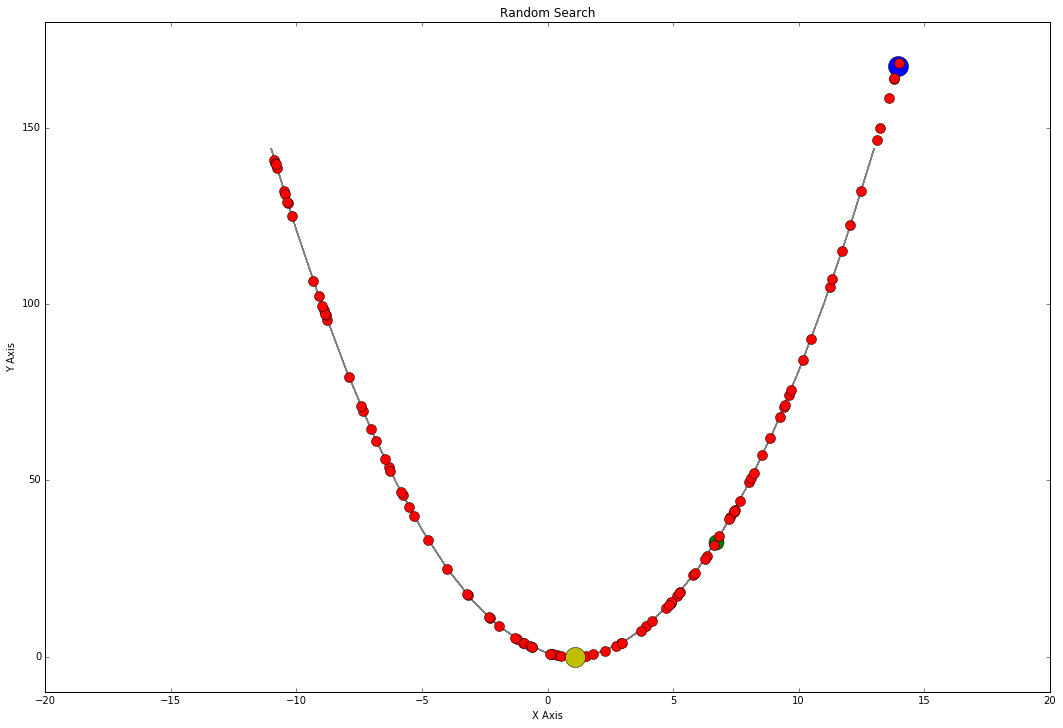

In [2]:
#Plot curve for Function 1

y1=[]
x1=[]

n=1
x=-12

while n<26:
    
    n+=1
    x+=1
    y = (x-1)**2
    y1.append(y)
    x1.append(x)
#print x1,y1

plt.figure(figsize=(18, 12), dpi=40)

for i in x1:
    plt.plot(x1,y1, color ='grey')
    plt.axis([-20,20,-10,180])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Random Search')
    plt.show
    

# Random Search: Function 1

x_begin = random.uniform(-11,14)
y_begin = (x_begin-1)**2

#print x_begin, y_begin
plt.plot(x_begin, y_begin, 'bo-', markersize=20)
plt.show


n1=0
while n1<100:

    x_next = random.uniform(-11,14)
    y_next = (x_next-1)**2    # calculated y
    #print x_next, y_next
    plt.plot(x_next, y_next,'ro-', markersize =10) # red points all the random point searches visited
    plt.show

    if y_next <=y_begin:
        x_begin = x_next 
        y_begin = y_next
    #print 'lowest value =',x_begin, y_begin
    plt.plot(x_begin, y_begin, 'go-', markersize = 15)  # green circle current local - will change when new lowest y found
    n1+=1
     
plt.plot(x_begin, y_begin, 'yo-', markersize=20)  #lowest value at end of random search is the gold/yellow circle

print 'Lowest y value is min point(Big Gold Dot):',x_begin, y_begin,'\n'
print ' Red Dot: ordinary steps;   Blue Dot: start point'
print ' Big Green Dot: minimum at some stage;    Big Gold Dot: minimum/optimum point at end'


5.09383767152 373.455906312
Lowest y value is min point(Big Gold Dot): -0.919623588572 -3.77046165876 

 Red Dot: ordinary step; Blue Dot: begin
 Big Green Dot: minimum at some stage;    Big Gold Dot: minimum/optimum point at end


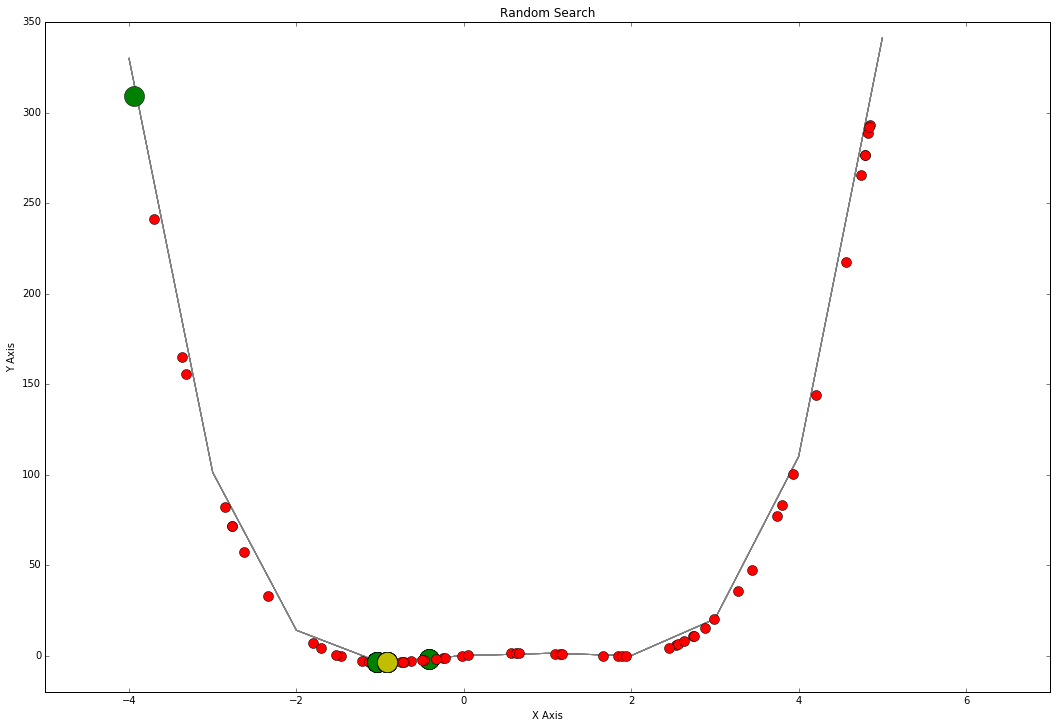

In [3]:
#Plot curve for Function 2

y1=[]
x1=[]

n=1
x=-5

while n<11:
    
    n+=1
    x+=1
    y = x*(x+1.5)*(x-1.5)*(x-2)
    y1.append(y)
    x1.append(x)

#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)

for i in x1:
    plt.plot(x1,y1, color = 'grey')
    plt.axis([-5,5,-20,400])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Random Search')
    plt.show

# Random Search: Function 2

x_begin = random.uniform(-4,10)
y_begin = x_begin*(x_begin+1.5)*(x_begin-1.5)*(x_begin-2)

print x_begin, y_begin
plt.plot(x_begin, y_begin, 'bo-', markersize=20)
plt.show


n1=0
while n1<100:
    
    x_next = random.uniform(-4,10)
    y_next = x_next*(x_next+1.5)*(x_next-1.5)*(x_next-2) # calculating y here
    #print x_next, y_next
    plt.plot(x_next, y_next,'ro', markersize =10) # red points all the random point searches visited
    plt.axis([-5,7,-20,350])
    plt.show

    if y_next <=y_begin:
        x_begin = x_next 
        y_begin = y_next
    #print 'lowest value =',x_begin, y_begin
    plt.plot(x_begin, y_begin, 'go-', markersize =20)  # green circle current local - will change when new lowest y found
    n1+=1

plt.plot(x_begin, y_begin, 'yo-', markersize =20)  #lowest value at end of random search is the gold/yellow circle


print 'Lowest y value is min point(Big Gold Dot):',x_begin, y_begin,'\n'

print ' Red Dot: ordinary step; Blue Dot: begin'
print ' Big Green Dot: minimum at some stage;    Big Gold Dot: minimum/optimum point at end'



_______________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________

Hill Climbing

Function 1: x starting at 0

minimum y value pair,: x,y: (0.9999999999999999, 1.232595164407831e-32)


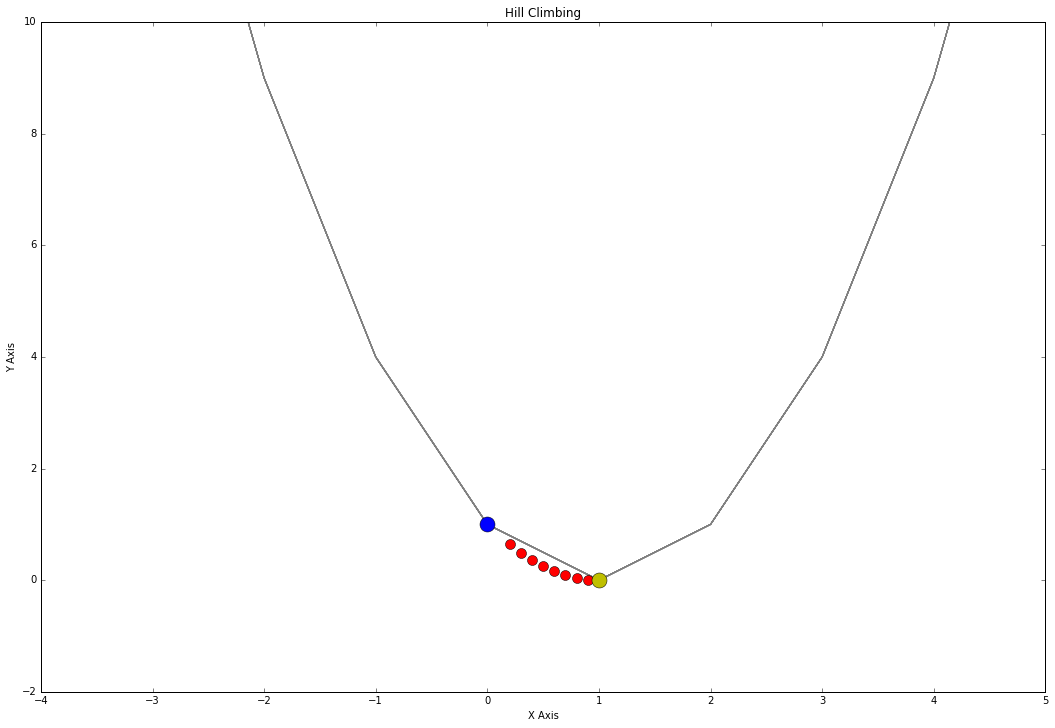

In [4]:

def find_y(x):
    return (x-1)**2

def get_xplus(x):
    return x+0.1      # next step right

def get_xminus(x):
    return x-0.1      # next step left


y1=[]
x1=[]

n=1
x=-5
 
# make a curve (with x -4 to 11)nwith min point to find and plot this curve

while n<15:
    
    n+=1
    x+=1
    y = (x-1)**2
    y1.append(y)
    x1.append(x)

#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)
for i in x1:
    plt.plot(x1,y1, color = 'grey')
    plt.axis([-4,5,-2,10])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Hill Climbing')
    plt.show

    
    # start hill climbing by deciding where to begin - (could do user input but here hard coding for x=1,x=0)  
    
#check slope direction and give x initial value
x_begin = 0
y_begin = find_y(x_begin)
compare =[(x_begin,y_begin)]
#print 'Start x,y:', x_begin, y_begin
plt.plot(x_begin,y_begin, 'bo-', markersize=15)
plt.show
x = x_begin # recalibrate here - if this not included value of next x below not correct 

#firstly checking here that should be moving to the right (ie incrementing x by 0.1 is moving downhill
x = get_xplus(x)  # get next x
y = find_y(x)     # calculate new y 
compare.append((x,y))  #add to list - now two values in list again 
    
old_y = compare [0][1] # don't remove - for use in loop
new_y = compare [1][1] #for use in loop 

#if it is downhill new_y will be less than old_y
if old_y > new_y:  # looking to minimize y as this will be lowest point of curve 

    compare.pop() # remove 2nd item on list as the same as first item
    while True:
        if old_y > new_y:
            x = get_xplus(x)  # get next x
            y = find_y(x)     # calculate new y 
            compare.append((x,y))  #add to list - now two values in list again 
            
            old_y = compare [0][1] # don't remove - for use in loop
            new_y = compare [1][1] #for use in loop 
            
            if old_y > new_y:
                compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                compare.pop() # remove 2nd item on list as the same as first item
                
                plt.plot(x,y,'ro-',markersize=10) # plot this 'new' lowest point
            
        else: 
            break  #if next y not lower then break out with min y
    
    plt.plot(compare[0][0],compare[0][1],'yo-',markersize=15)


# if new_y not less than old_y above then move left to see and check new_y vs old_y again
elif old_y <new_y:
    x = x_begin #reset x to initial value  - then can look left
    x = get_xminus(x)
    y = find_y(x)     # calculate new y 
    compare.pop()
    compare.append((x,y))  #add to list - now two values in list again 

    old_y = compare [0][1] # don't remove - for use in loop
    new_y = compare [1][1] #for use in loop 
    if old_y > new_y:
        
        compare.pop() # remove 2nd item on list as the same as first item
        while True:
    
            if old_y > new_y:
    
                x = get_xminus(x)  # get next x
                y = find_y(x)     # calculate new y 
                compare.append((x,y))  #add to list - now two values in list again 
                
                old_y = compare [0][1] # don't remove - for use in loop
                new_y = compare [1][1] #for use in loop 
                
                if old_y > new_y:
                    compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                    compare.pop() # remove 2nd item on list as the same as first item
                    plt.plot(x,y,'g.-',markersize=15) # plot this 'new' lowest point
            else: 
                break  #if next y not lower then break out with min y
        plt.plot(x,y,'yo-',markersize = 15)
    
    else:
        print 'you started with minimum point :',x_begin, y_begin
        x,y = x_begin, y_begin
print 'minimum y value pair,: x,y:',compare[0]  # this should give lowest pair 

Function 1: x starting at 1 (this is min point so prog should see this)

you started with minimum point : 1 0
minimum y value pair,: x,y: (1, 0)


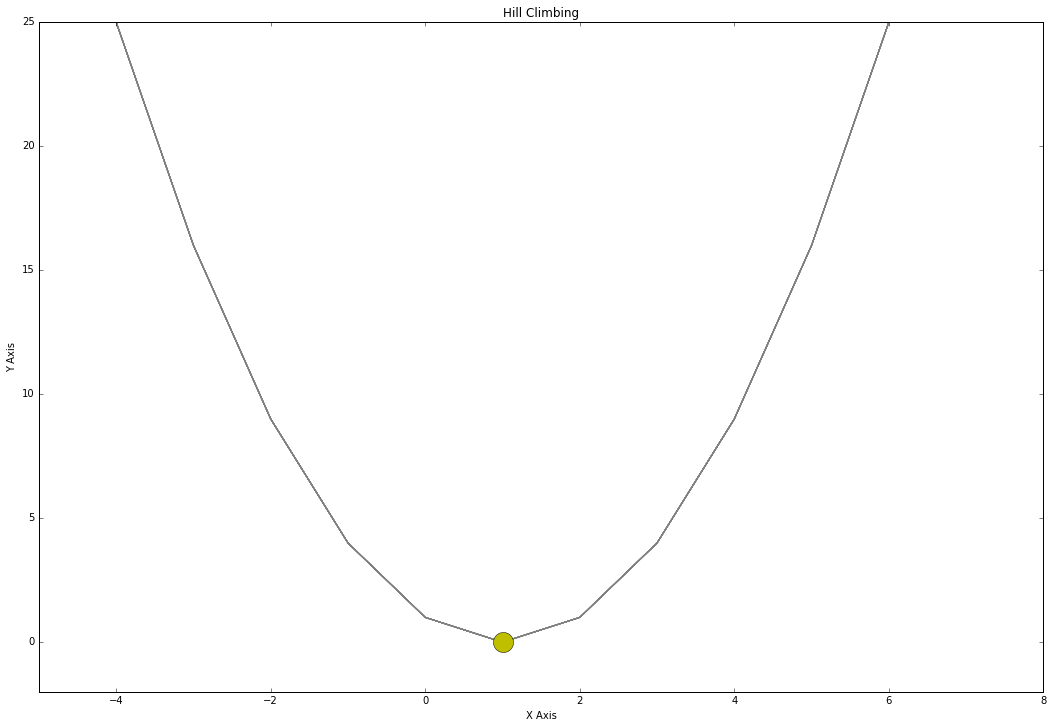

In [5]:

def find_y(x):
    return (x-1)**2

def get_xplus(x):
    return x+0.1      # next step right

def get_xminus(x):
    return x-0.1      # next step left


y1=[]
x1=[]

n=1
x=-5
 
# make a curve (with x -4 to 11)nwith min point to find and plot this curve


while n<15:
    
    n+=1
    x+=1
    y = (x-1)**2
    y1.append(y)
    x1.append(x)

#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)
for i in x1:
    plt.plot(x1,y1, color = 'grey')
    plt.axis([-5,8,-2,25])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Hill Climbing')
    plt.show

    
    # start hill climbing by deciding where to begin - (could do user input but here hard coding for x=1,x=0)  
    
#check slope direction and give x initial value
x_begin = 1
y_begin = find_y(x_begin)
compare =[(x_begin,y_begin)]
#print 'Start x,y:', x_begin, y_begin
plt.plot(x_begin,y_begin, 'bo-',markersize=15)
plt.show
x = x_begin # recalibrate here - if this not included value of next x below not correct 

#firstly checking here that should be moving to the right (ie incrementing x by 0.1 is moving downhill
x = get_xplus(x)  # get next x
y = find_y(x)     # calculate new y 
compare.append((x,y))  #add to list - now two values in list again 
    
old_y = compare [0][1] # don't remove - for use in loop
new_y = compare [1][1] #for use in loop 

#if it is downhill new_y will be less than old_y
if old_y > new_y:  # looking to minimize y as this will be lowest point of curve 

    compare.pop() # remove 2nd item on list as the same as first item
    while True:
        if old_y > new_y:
            x = get_xplus(x)  # get next x
            y = find_y(x)     # calculate new y 
            compare.append((x,y))  #add to list - now two values in list again 
            
            old_y = compare [0][1] # don't remove - for use in loop
            new_y = compare [1][1] #for use in loop 
            
            if old_y > new_y:
                compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                compare.pop() # remove 2nd item on list as the same as first item
                
                plt.plot(x,y,'ro-') # plot this 'new' lowest point
            
        else: 
            break  #if next y not lower then break out with min y
    
    plt.plot(compare[0][0],compare[0][1],'yo-', markersize=15 )


# if new_y not less than old_y above then move left to see and check new_y vs old_y again
elif old_y <new_y:
    x = x_begin #reset x to initial value  - then can look left
    x = get_xminus(x)
    y = find_y(x)     # calculate new y 
    compare.pop()
    compare.append((x,y))  #add to list - now two values in list again 

    old_y = compare [0][1] # don't remove - for use in loop
    new_y = compare [1][1] #for use in loop 
    if old_y > new_y:
        
        compare.pop() # remove 2nd item on list as the same as first item
        while True:
    
            if old_y > new_y:
    
                x = get_xminus(x)  # get next x
                y = find_y(x)     # calculate new y 
                compare.append((x,y))  #add to list - now two values in list again 
                
                old_y = compare [0][1] # don't remove - for use in loop
                new_y = compare [1][1] #for use in loop 
                
                if old_y > new_y:
                    compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                    compare.pop() # remove 2nd item on list as the same as first item
                    plt.plot(x,y,'go-',markersize=15) # plot this 'new' lowest point
            else: 
                break  #if next y not lower then break out with min y
        plt.plot(x,y,'yo-', markersize=20)
    
    else:
        print 'you started with minimum point :',x_begin, y_begin
        x,y = x_begin, y_begin
        plt.plot(x,y,'yo-', markersize=20)
print 'minimum y value pair,: x,y:',compare[0]  # this should give lowest pair 

Function 2: x starting at 1

min value: (1.8000000000000007, -0.35639999999999983)


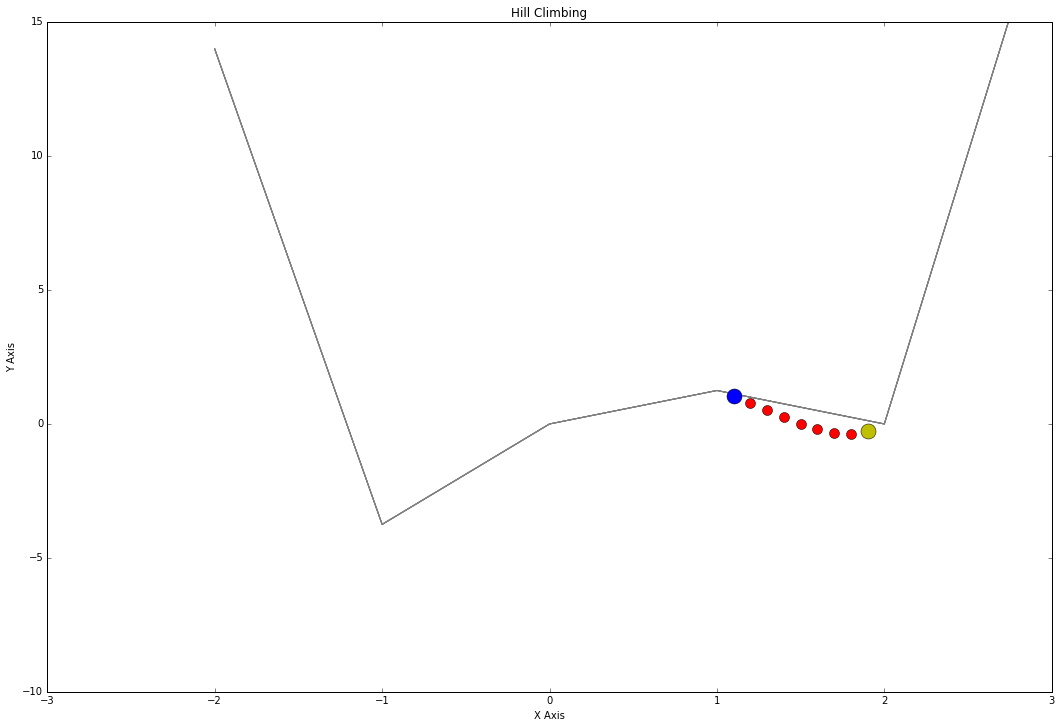

In [6]:
def find_y(x):
    return x*(x+1.5)*(x-1.5)*(x-2)

def get_xplus(x):
    return x+0.1   # for step right

def get_xminus(x):
    return x-0.1   # for step left

y1=[]
x1=[]

n=1
x=-3
 
# make a curve (with x -3 to 4)with min point to find and plot this curve

while n<7:
    
    n+=1
    x+=1
    y = x*(x+1.5)*(x-1.5)*(x-2)
    y1.append(y)
    x1.append(x)

#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)

for i in x1:
    plt.plot(x1,y1, color = 'grey')
    plt.axis([-3,3,-10,15])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Hill Climbing')
    plt.show

    
    # start hill climbing by deciding where to begin - (could do user input but here hard coding for x=1,x=0)  
    
#check slope direction and give x initial value of 0
x_begin = 1.1
y_begin = find_y(x_begin)
compare =[(x_begin,y_begin)]
plt.plot(x_begin,y_begin, 'bo-', markersize =15)
plt.show
x = x_begin # recalibrate here - if this not included value of next x below not correct 

#firstly checking here that should be moving to the right (ie incrementing x by 0.1 is moving downhill
x = get_xplus(x)  # get next x
y = find_y(x)     # calculate new y 
compare.append((x,y))  #add to list - now two values in list again 
plt.plot(x,y,'ro-',markersize = 10)  

old_y = compare [0][1] # don't remove - for use in loop
new_y = compare [1][1] #for use in loop 


#if it is downhill new_y will be less than old_y
if old_y > new_y:  # looking to minimize y as this will be lowest point of curve 

    compare.pop() # remove 2nd item on list as the same as first item
    while True:
        if old_y > new_y:
            x = get_xplus(x)  # get next x
            y = find_y(x)     # calculate new y 
            compare.append((x,y))  #add to list - now two values in list again 
            old_y = compare [0][1] # don't remove - for use in loop
            new_y = compare [1][1] #for use in loop 
            if old_y > new_y:
                compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                compare.pop() # remove 2nd item on list as the same as first item
                #print 'c', compare  # check list has only one (x,y) pair again - this is current min (x,y) 
                plt.plot(x,y,'ro-',markersize = 10)# plot this 'new' lowest point
            
        else: 
            break  #if next y not lower then break out with min y
    
    print 'min value:',compare[0]  # this should give lowest pair 
    plt.plot(x,y,'yo-',markersize=15)


# if new_y not less than old_y above then move left to see and check new_y vs old_y again
elif old_y <new_y:
    x = x_begin #reset x to initial value  - then can look left
    x = get_xminus(x)
    y = find_y(x)     # calculate new y 
    compare.pop()
    compare.append((x,y))  #add to list - now two values in list again 
    old_y = compare [0][1] # don't remove - for use in loop
    new_y = compare [1][1] #for use in loop 
    if old_y > new_y:
        compare.pop() # remove 2nd item on list as the same as first item
        while True:
            if old_y > new_y:
                x = get_xminus(x)  # get next x
                y = find_y(x)     # calculate new y
                compare.append((x,y))  #add to list - now two values in list again 
                
                old_y = compare [0][1] # don't remove - for use in loop
                new_y = compare [1][1] #for use in loop 
                
                if old_y > new_y:
                    #print 'in loop',compare #check values
                    compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                    compare.pop() # remove 2nd item on list as the same as first item
            
                    #print 'c', compare  # check list has only one (x,y) pair again - this is current min (x,y) 
                    plt.plot(x,y,'go-',markersize=10) # plot this 'new' lowest point
            else: 
                break  #if next y not lower then break out with min y
    
        plt.plot(x,y,'yo-',markersize=15)
    else:
        print 'you started with minimum point :',x_begin, y_begin
        x,y = x_begin, y_begin
    print 'min value:',compare[0]  # this should give lowest pair 
    plt.plot(x,y,'yo-', markersize=15)

__________________________________________________________________________________________________________________________________________________

Function 2: x starting at 0

min value: (-0.8999999999999999, -3.7584)


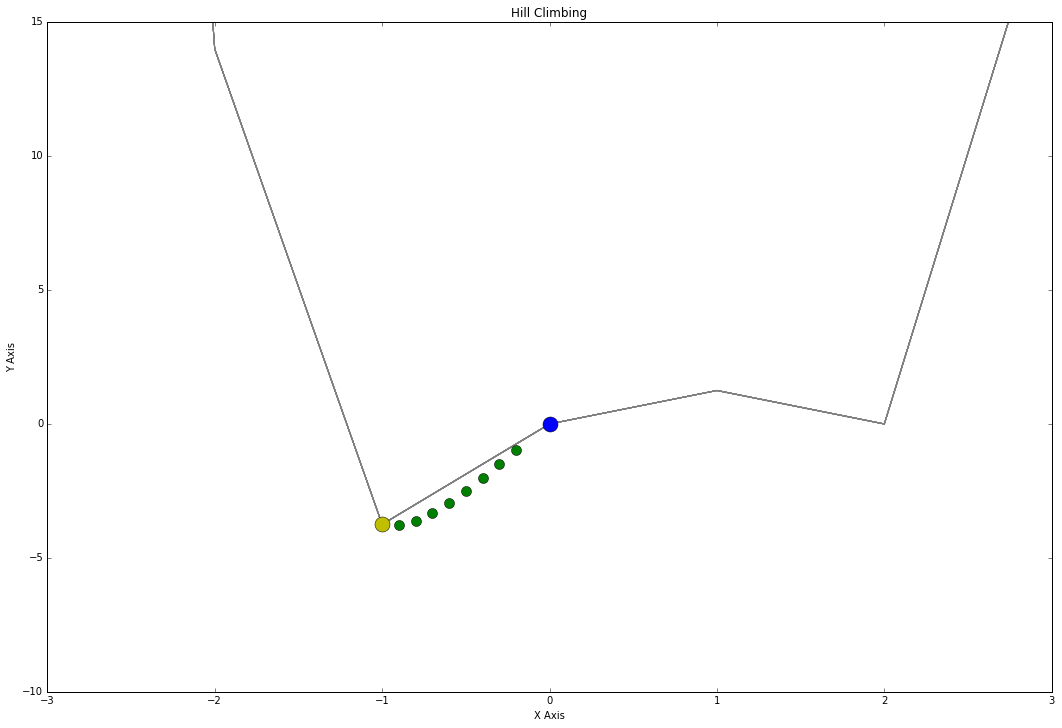

In [7]:
def find_y(x):
    return x*(x+1.5)*(x-1.5)*(x-2)

def get_xplus(x):
    return x+0.1   # for step right

def get_xminus(x):
    return x-0.1   # for step left

y1=[]
x1=[]

n=1
x=-5
 
# make a curve (with x -4 to 11)nwith min point to find and plot this curve

while n<15:
    
    n+=1
    x+=1
    y = x*(x+1.5)*(x-1.5)*(x-2)
    y1.append(y)
    x1.append(x)

#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)
for i in x1:
    plt.plot(x1,y1, color = 'grey')
    plt.axis([-3,3,-10,15])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Hill Climbing')
    plt.show

    
    # start hill climbing by deciding where to begin - (could do user input but here hard coding for x=1,x=0)  
    
#check slope direction and give x initial value of 0
x_begin = 0
y_begin = find_y(x_begin)
compare =[(x_begin,y_begin)]
plt.plot(x_begin,y_begin, 'bo-', markersize=15)
plt.show
x = x_begin # recalibrate here - if this not included value of next x below not correct 

#firstly checking here that should be moving to the right (ie incrementing x by 0.1 is moving downhill
x = get_xplus(x)  # get next x
y = find_y(x)     # calculate new y 
compare.append((x,y))  #add to list - now two values in list again 
    
old_y = compare [0][1] # don't remove - for use in loop
new_y = compare [1][1] #for use in loop 


#if it is downhill new_y will be less than old_y
if old_y > new_y:  # looking to minimize y as this will be lowest point of curve 

    compare.pop() # remove 2nd item on list as the same as first item
    while True:
        if old_y > new_y:
            x = get_xplus(x)  # get next x
            y = find_y(x)     # calculate new y 
            compare.append((x,y))  #add to list - now two values in list again 
            old_y = compare [0][1] # don't remove - for use in loop
            new_y = compare [1][1] #for use in loop 
            if old_y > new_y:
                compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                compare.pop() # remove 2nd item on list as the same as first item
                #print 'c', compare  # check list has only one (x,y) pair again - this is current min (x,y) 
                plt.plot(x,y,'ro-', markersize = 10) # plot this 'new' lowest point
            
        else: 
            print 'minimum point is', x,y 
            break  #if next y not lower then break out with min y
    
    print 'min value:',compare[0]  # this should give lowest pair 
    plt.plot(compare[0][0],compare[0][1],'yo-', markersize=15)


# if new_y not less than old_y above then move left to see and check new_y vs old_y again
elif old_y <new_y:
    x = x_begin #reset x to initial value  - then can look left
    x = get_xminus(x)
    y = find_y(x)     # calculate new y 
    compare.pop()
    compare.append((x,y))  #add to list - now two values in list again 
    old_y = compare [0][1] # don't remove - for use in loop
    new_y = compare [1][1] #for use in loop 
    if old_y > new_y:
        compare.pop() # remove 2nd item on list as the same as first item
        while True:
            if old_y > new_y:
                x = get_xminus(x)  # get next x
                y = find_y(x)     # calculate new y
                compare.append((x,y))  #add to list - now two values in list again 
                
                old_y = compare [0][1] # don't remove - for use in loop
                new_y = compare [1][1] #for use in loop 
                
                if old_y > new_y:
                    #print 'in loop',compare #check values
                    compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                    compare.pop() # remove 2nd item on list as the same as first item
            
                    #print 'c', compare  # check list has only one (x,y) pair again - this is current min (x,y) 
                    plt.plot(x,y,'go-',markersize=10) # plot this 'new' lowest point
            else: 
                break  #if next y not lower then break out with min y
    
        plt.plot(x,y,'yo-')
    else:
        print 'you started with minimum point :',x_begin, y_begin
        x,y = x_begin, y_begin
    print 'min value:',compare[0]  # this should give lowest pair 
    plt.plot(x,y,'yo-', markersize=15)

_________________________________________________________________________________________________________________________________________________

_______________________________________________________________________________________________________________________________________________

Gradient Descent:
may be computationally expensive much much handier coding than hill climbing 
using slope means automatically corrects to the correct direction ( for minimize: minus slope)


Gradient Descent: Function 1

minimum y value pair: x,y : (0.9999999999999999, 1.232595164407831e-32)


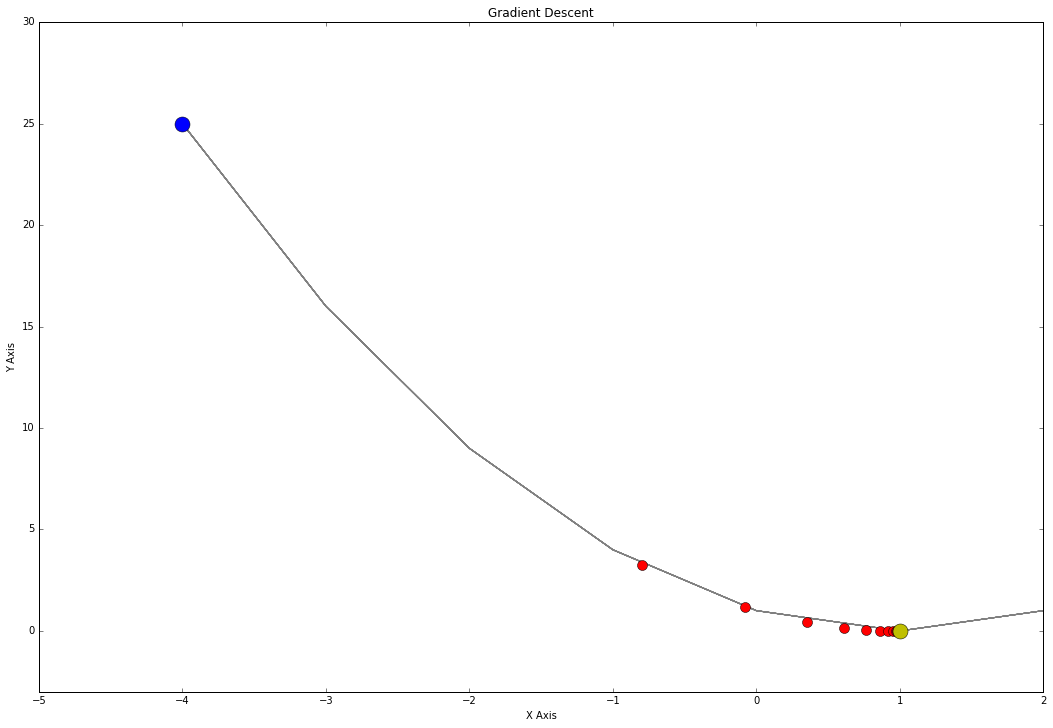

In [8]:
#Gradient Descent: Function 1:x= -4

def find_y(x):
    return (x-1)**2

def get_xplusstep(x):     # next step - minus slope => always go downhill
    step = -slope(x)*0.2
    return x+step

def slope(x):
    return 2*(x)-2

y1=[]
x1=[]


n=1
x=-5
 
# make a curve (with x -4 to 11) with min point to find and plot this curve

while n<15:
    
    n+=1
    x+=1
    y = find_y(x)
    y1.append(y)
    x1.append(x)

#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)

for i in x1:
    plt.plot(x1,y1, color = 'grey')
    plt.axis([-5,2,-3,30])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Gradient Descent')
    plt.show

#checking to see if functions above work
#print ' STEP SIZE',slope(4)
#print ' STEP SIZE',slope(2)
#print ' STEP SIZE',slope(-1)


# start gradient descent by deciding where to begin - (could do user input but here hard coding for x=4
x_begin = -4
y_begin = find_y(x_begin)
compare =[(x_begin,y_begin)]
plt.plot(x_begin,y_begin, 'bo-',markersize=15)
plt.show
x = x_begin # recalibrate here - if this not included value of next x below not correct 
x = get_xplusstep(x)  # get next x - slope has already been calculated in function slope 

y = find_y(x)     # calculate new y 
compare.append((x,y))  #add to list - now two values in list again    
old_y = compare [0][1] # don't remove - for use in loop
new_y = compare [1][1] #for use in loop 

#if it is downhill new_y will be less than old_y
if old_y > new_y:  # looking to minimize y as this will be lowest point of curve 

    compare.pop() # remove 2nd item on list as the same as first item
    while True:
        if old_y > new_y:
            x = get_xplusstep(x)  # get next x
            y = find_y(x)     # calculate new y 
            compare.append((x,y))  #add to list - now two values in list again 
            old_y = compare [0][1] # don't remove - for use in loop
            new_y = compare [1][1] #for use in loop 
            if old_y > new_y:
                compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                compare.pop() # remove 2nd item on list as the same as first item
                plt.plot(x,y,'ro-',markersize=10) # plot this 'new' lowest point  
        else: 
            break  #if next y not lower then break out with min y
else:
    print 'you started with minimum point :',x_begin, y_begin
    x,y = x_begin, y_begin
print 'minimum y value pair: x,y :',compare[0]  # lowest pair 
plt.plot(x,y,'yo-',markersize=15)

minimum y value pair: x.y : (1.0000000000000002, 4.930380657631324e-32)


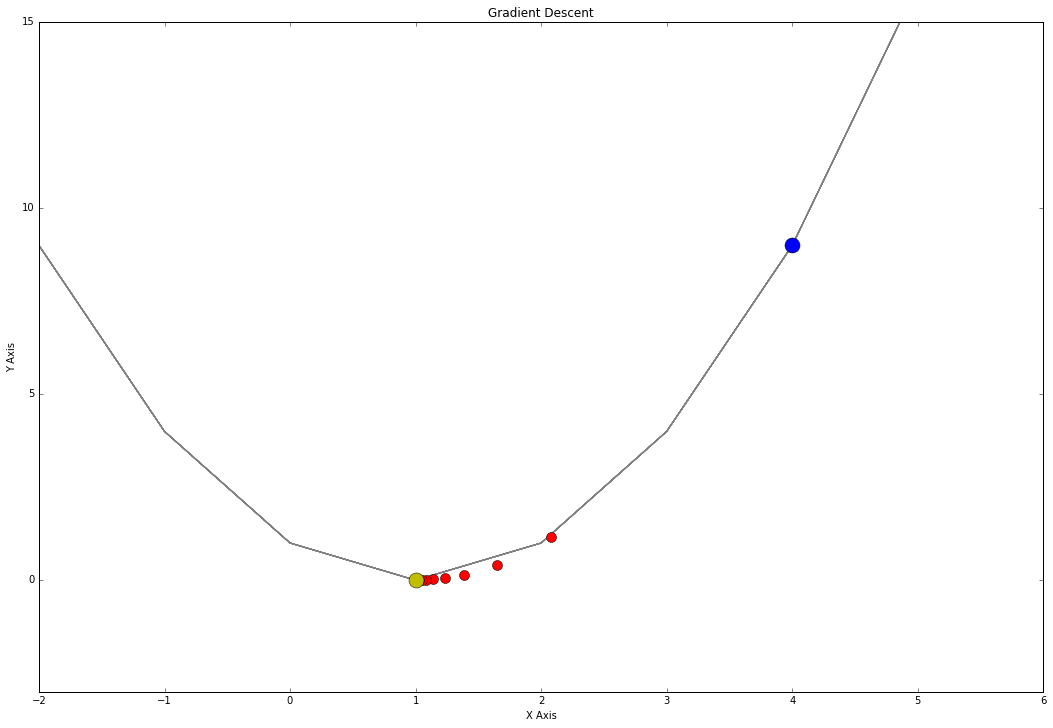

In [9]:
#Gradient Descent: Function 1: x= 4

def find_y(x):
    return (x-1)**2

def get_xplusstep(x):     # next step - minus slope => always go downhill
    step = -slope(x)*0.2
    return x+step

def slope(x):
    return 2*(x)-2

y1=[]
x1=[]


n=1
x=-5
 
# make a curve (with x -4 to 11) with min point to find and plot this curve

while n<15:
    
    n+=1
    x+=1
    y = find_y(x)
    y1.append(y)
    x1.append(x)

#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)
for i in x1:
    plt.plot(x1,y1, color = 'grey')
    plt.axis([-2,6,-3,15])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Gradient Descent')
    plt.show

#checking to see if functions above work
#print ' STEP SIZE',slope(4)
#print ' STEP SIZE',slope(2)
#print ' STEP SIZE',slope(-1)


# start gradient descent by deciding where to begin - (could do user input but here hard coding for x=4
x_begin = 4
y_begin = find_y(x_begin)
compare =[(x_begin,y_begin)]
plt.plot(x_begin,y_begin, 'bo-',markersize=15)
plt.show
x = x_begin # recalibrate here - if this not included value of next x below not correct 
x = get_xplusstep(x)  # get next x - slope has already been calculated in function slope 

y = find_y(x)     # calculate new y 
compare.append((x,y))  #add to list - now two values in list again    
old_y = compare [0][1] # don't remove - for use in loop
new_y = compare [1][1] #for use in loop 

#if it is downhill new_y will be less than old_y
if old_y > new_y:  # looking to minimize y as this will be lowest point of curve 

    compare.pop() # remove 2nd item on list as the same as first item
    while True:
        if old_y > new_y:
            x = get_xplusstep(x)  # get next x
            y = find_y(x)     # calculate new y 
            compare.append((x,y))  #add to list - now two values in list again 
            old_y = compare [0][1] # don't remove - for use in loop
            new_y = compare [1][1] #for use in loop 
            if old_y > new_y:
                compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                compare.pop() # remove 2nd item on list as the same as first item
                plt.plot(x,y,'ro-',markersize=10) # plot this 'new' lowest point  
        else: 
            break  #if next y not lower then break out with min y
else:
    print 'you started with minimum point :',x_begin, y_begin
    x,y = x_begin, y_begin
print 'minimum y value pair: x.y :',compare[0]  # lowest pair 
plt.plot(x,y,'yo-', markersize=15)

min value: (-0.9460648983670086, -3.776505318002156)


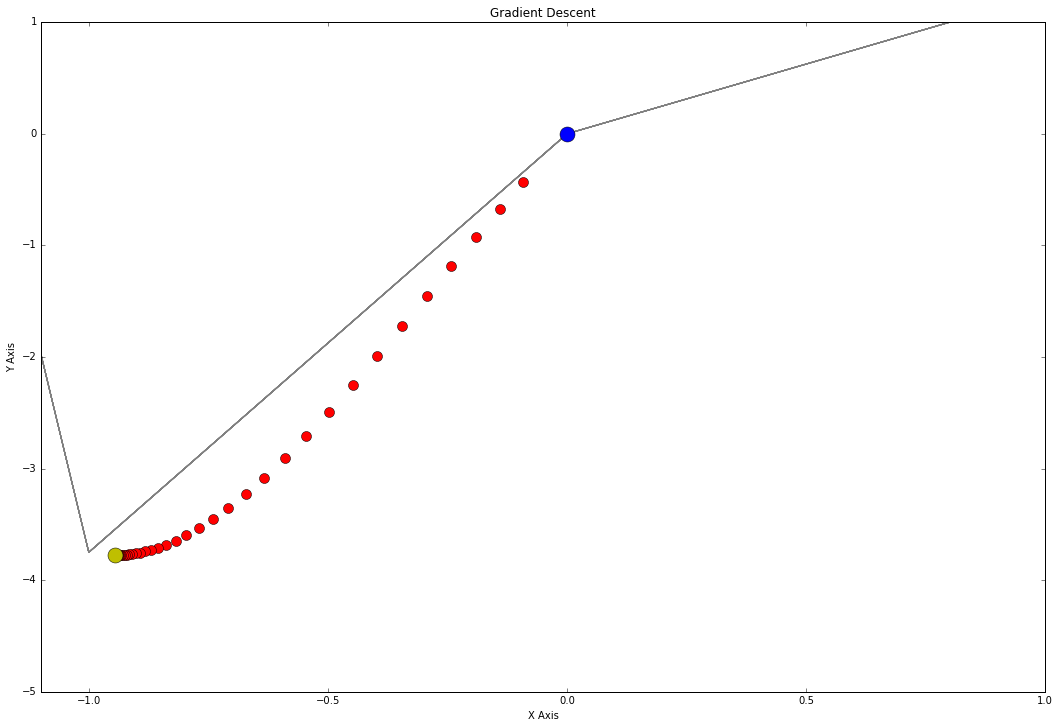

In [10]:
# Gradient Descent: Function 2: starting x = 0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random


def find_y(x):
    return x*(x+1.5)*(x-1.5)*(x-2)


def get_xplusstep(x):    #next step: minus slope gives minimize direction
    step = -slope(x)*0.01
    return x+step

def slope(x):
    return 4*(x**3)-6*(x**2)-4.5*(x)+4.5

y1=[]
x1=[]


n=1
x=-5
 
# make a curve (with x -4 to 11) with min point to find and plot this curve

while n<15:
    
    n+=1
    x+=1
    y = find_y(x)
    y1.append(y)
    x1.append(x)

#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)
for i in x1:
    plt.plot(x1,y1, color = 'grey')
    plt.axis([-1.1,1,-5,1])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Gradient Descent')
    plt.show

#checking to see if function above work
#print ' STEP SIZE',slope(4)
#print ' STEP SIZE',slope(2)
#print ' STEP SIZE',slope(-1)

# start gradient descent by deciding where to begin - (could do user input but here hard coding for x=0) 

x_begin = 0
y_begin = find_y(x_begin)
compare =[(x_begin,y_begin)]
#print 'Start x,y:', x_begin, y_begin
plt.plot(x_begin,y_begin, 'bo-',markersize=15)
plt.show
x = x_begin # recalibrate here - if this not included value of next x below not correct 

x = get_xplusstep(x)  # get next x - slope has already been calculated in function slope 

y = find_y(x)     # calculate new y 
compare.append((x,y))  #add to list - now two values in list again 
    
old_y = compare [0][1] # don't remove - for use in loop
new_y = compare [1][1] #for use in loop too

# if it is downhill new_y will be less than old_y
if old_y > new_y:  # looking to minimize y as this will be lowest point of curve 
    compare.pop() # remove 2nd item on list as the same as first item
    while True:
        if old_y > new_y:
            x = get_xplusstep(x)  # get next x
            y = find_y(x)     # calculate new y 
            compare.append((x,y))  #add to list - now two values in list again 
            old_y = compare [0][1] # don't remove - for use in loop
            new_y = compare [1][1] #for use in loop 
            if old_y > new_y:
                compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                compare.pop() # remove 2nd item on list as the same as first item
                plt.plot(x,y,'ro-',markersize=10) # plot this 'new' lowest point           
        else: 
            break  #if next y not lower then break out with min y
else:
    print 'you started with minimum point :',x_begin, y_begin
    x,y = x_begin, y_begin
print 'min value:',compare[0]  # this should give lowest pair 
plt.plot(x,y,'yo-',markersize=15)

minimum y value is best x,y: (1.7768123850157027, -0.35970689089653773)


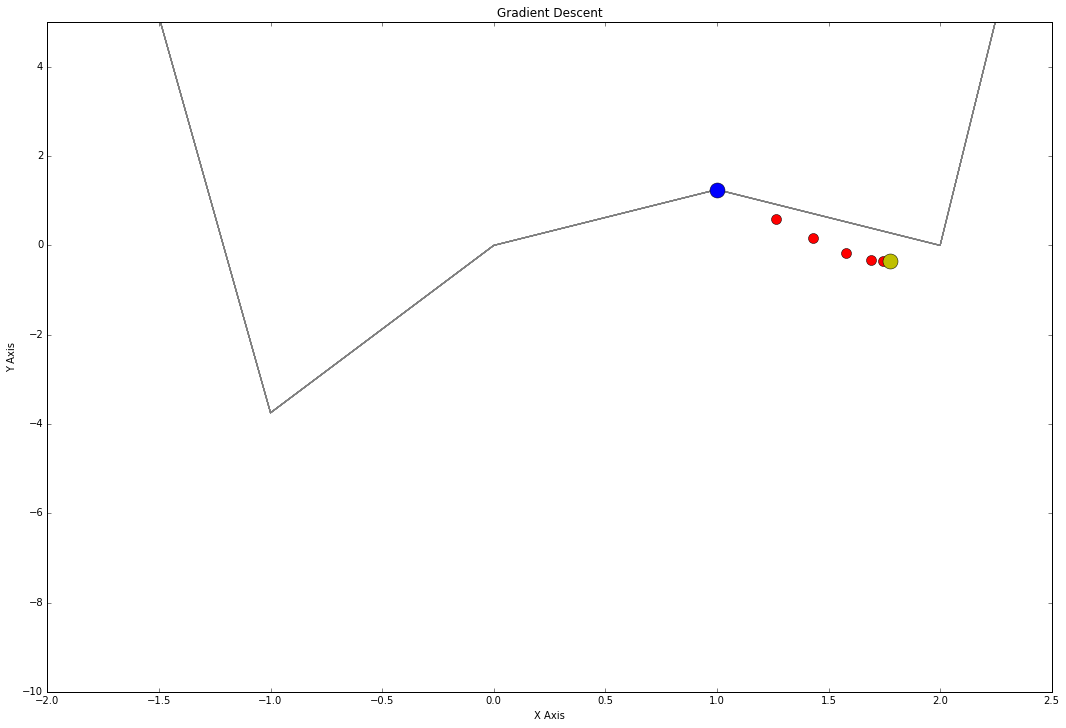

In [11]:
# Gradient Descent: Function 2: starting x =1

def find_y(x):
    return x*(x+1.5)*(x-1.5)*(x-2)

def get_xplusstep(x):
    step = -slope(x)*0.06
    return x+step

def slope(x):
    return 4*(x**3)-6*(x**2)-4.5*(x)+4.5

y1=[]
x1=[]

n=1
x=-5
 
# make a curve (with x -4 to 11) with min point to find and plot this curve

while n<15:
    
    n+=1
    x+=1
    y = find_y(x)
    y1.append(y)
    x1.append(x)

#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)
for i in x1:
    plt.plot(x1,y1, color = 'grey')
    plt.axis([-2,2.5,-10,5])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Gradient Descent')
    plt.show

## start gradient descent by deciding where to begin - (could do user input but here hard coding for x=1)

x_begin = 1
y_begin = find_y(x_begin)
compare =[(x_begin,y_begin)]
plt.plot(x_begin,y_begin, 'bo-', markersize=15)
plt.show
x = x_begin # recalibrate here - if this not included value of next x below not correct 
x = get_xplusstep(x)  # get next x - slope has already been calculated in function slope 
y = find_y(x)     # calculate new y 
compare.append((x,y))  #add to list - now two values in list again 
    
old_y = compare [0][1] # don't remove - for use in loop
new_y = compare [1][1] #for use in loop 

#if it is downhill new_y will be less than old_y
if old_y > new_y:  # looking to minimize y as this will be lowest point of curve 
    compare.pop() # remove 2nd item on list as the same as first item
    while True:
        if old_y > new_y:
            x = get_xplusstep(x)  # get next x
            y = find_y(x)     # calculate new y 
            compare.append((x,y))  #add to list - now two values in list again 
            old_y = compare [0][1] # don't remove - for use in loop
            new_y = compare [1][1] #for use in loop 
            if old_y > new_y:
                compare[0] = compare[1] # move new (x,y) pair into position 0 on list overwriting old (x,y) 
                compare.pop() # remove 2nd item on list as the same as first item
                plt.plot(x,y,'ro-',markersize=10) # plot this 'new' lowest point as move down to lowest y
            
        else: 
            break  #if next y not lower then break out with min     
else:
    print 'you started with minimum point :',x_begin, y_begin
    x,y = x_begin, y_begin
print 'minimum y value is best x,y:',compare[0]  # x,y pair with lowest y lowest 
plt.plot(x,y,'yo-',markersize =15)

______________________________________________________________________________________________________________________________________________

___________________________________________________________________________________________________________________________________________

Simulated Annealing

Beginning point (Big Green Dot): 3.26228581001 , 5.11793708615
Lowest y value is min point(Big Gold Dot): 1.59193729662 , 0.350389763127 

 Red Dot: upward step; Blue Dot: downward step
 Big Green Dot: start;    Big Gold Dot: minimum/optimum point 


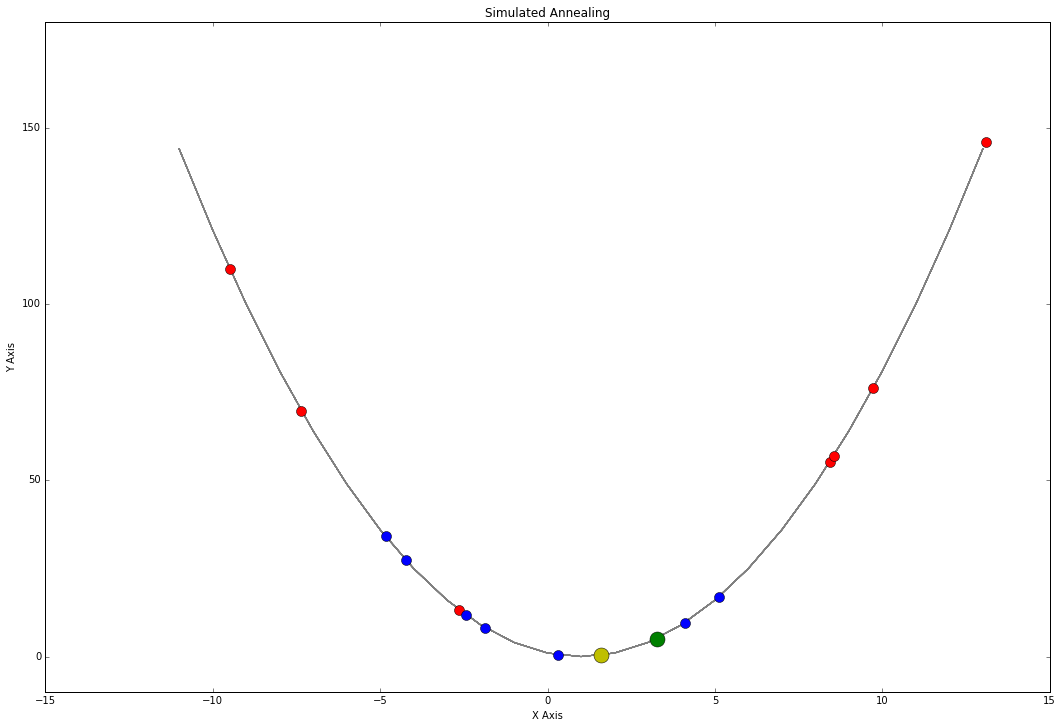

In [12]:
#Simulated Annealing: Function 1

# referenced katrinaeg.com/simulated-annealing.html for some ideas on 
# (i)the calculation of whether to move uphill - added her e calculation based on cost to my counter


def find_y(x):
    return (x-1)**2

def cost (x,y,z):
    e =2.71828
    return(e)**((y_begin-y_next)/T)

y1=[]
x1=[]

n=-5
x=-12
#x = random.uniform()

while n<20:
    
    n+=1
    x+=1
    y = (x-1)**2
    y1.append(y)
    x1.append(x)
#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)

for i in x1:
    plt.plot(x1,y1, color='grey')
    plt.axis([-15,15,-10,180])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Simulated Annealing')
    plt.show


x_begin = random.uniform(-11,14)
y_begin = (x_begin-1)**2

print 'Beginning point (Big Green Dot):',x_begin,',', y_begin
plt.plot(x_begin, y_begin, 'go-',markersize=15)
plt.show

T=1
alpha=0.9
counter = 0
n1=100
while n1>0:

    x_next = random.uniform(-10,11)*(n/10) #reducing steps
    #print 'x next =', x_next
    y_next = (x_next-1)**2    # calculated y
    #print x_next, y_next


    if y_next <=y_begin:
        x_begin = x_next 
        y_begin = y_next
        #print 'lowest value =',x_begin, y_begin
        plt.plot(x_begin, y_begin, 'bo-',markersize=10)  # blue circle current local - will change when new lowest y found
        #n1-=1
    
    elif y_next>y_begin:
        
        if counter <10 and cost(y_begin,y_next,T)>random.uniform(-4,4): # keeping counter here the e^((old_y minus new_y)/T) as per ref at top of page
            #print 'GOING UP',counter+1
            x_begin = x_next 
            y_begin = y_next
            counter+=1
        
            plt.plot(x_begin, y_begin, 'ro-',markersize=10)  # red circle current local - will change when new lowest y found
    n1-=1

plt.plot(x_begin, y_begin, 'yo-',markersize=15)  #lowest value at end of simulated annealing search is the gold/yellow circle

print 'Lowest y value is min point(Big Gold Dot):',x_begin,',' ,y_begin,'\n'
print ' Red Dot: upward step; Blue Dot: downward step'
print ' Big Green Dot: start;    Big Gold Dot: minimum/optimum point '

Beginning point: 6.50249540678 1172.04817947
Lowest y value is min point(Big Gold Dot): -0.871730536681 -3.73024401927 

 Red Dot: upward step; Blue Dot: downward step
 Big Green Dot: start;    Big Gold Dot: minimum/optimum point 


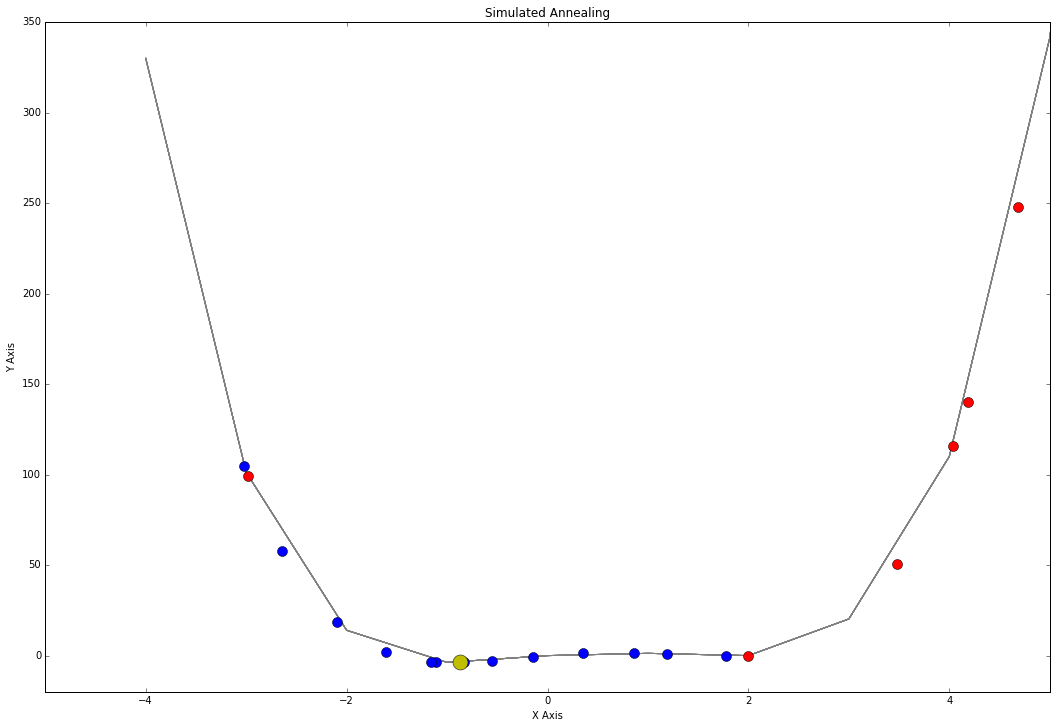

In [13]:
#Simulated Annealing Function 2

# referenced katrinaeg.com/simulated-annealing.html for some ideas on 
# (i)the calculation of whether to move uphill - added her e calculation based on cost to my counter



def find_y(x):
    return x*(x+1.5)*(x-1.5)*(x-2)

def cost (x,y,z):
    e =2.71828
    return(e)**((y_begin-y_next)/T)
    
y1=[]
x1=[]

n=1
x=-5
#x = random.uniform()

while n<12:
    
    n+=1
    x+=1
    y = x*(x+1.5)*(x-1.5)*(x-2)
    y1.append(y)
    x1.append(x)
#print x1,y1
plt.figure(figsize=(18, 12), dpi=40)

for i in x1:
    plt.plot(x1,y1, color='grey')
    plt.axis([-5,5,-20,350])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title ('Simulated Annealing')
    plt.show


x_begin = random.uniform(-4,8)
y_begin = find_y(x_begin)
print 'Beginning point:',x_begin, y_begin
plt.plot(x_begin, y_begin, 'go-',markersize=15)
plt.show

T=1
alpha = 0.9

counter = 0
n1=100
while n1>0:
    
    x_next = random.uniform(-4,8)*(n/10) # n/10 reducing as n gets smaller 
    
    y_next = find_y(x_next)    # calculated y
    #print x_next, y_next
    

    if y_next <=y_begin:
        x_begin = x_next 
        y_begin = y_next
        
        plt.plot(x_begin, y_begin, 'bo-',markersize=10)  # blue circle current local - will change when new lowest y found
        
    
    elif y_next>y_begin: # check re going uphill

        if counter <10 and cost(y_begin,y_next,T)>random.uniform(-4,4): # keeping counter here the e^((old_y minus new_y)/T) as per ref at top of page
            
            #print 'GOING UP',counter+1
            x_begin = x_next 
            y_begin = y_next
            counter+=1
            T=T*alpha
            plt.plot(x_begin, y_begin, 'ro-', markersize=10)  # green circle current local - will change when new lowest y found
    n1-=1
    
plt.plot(x_begin, y_begin, 'yo-',markersize=15)  #lowest value at end of simulated annealing search is the gold/yellow circle
print 'Lowest y value is min point(Big Gold Dot):',x_begin, y_begin,'\n'
print ' Red Dot: upward step; Blue Dot: downward step'
print ' Big Green Dot: start;    Big Gold Dot: minimum/optimum point '